In [1]:
# Importing the required libraries
# Pandas and Numpy libraries will be used for data manipulations, Matplotlib and Seaborn will be used for data visualizations which will be required for Analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/train_1.csv')
campaign_data = pd.read_csv('/content/Exog_Campaign_eng')

In [3]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
df.shape

(145063, 551)

In [5]:
 campaign_data.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [6]:
campaign_data.shape

(550, 1)

In [7]:
df['Page'].sample(20)     #Let's just look at some random Page values to understand the page name format to extract some useful values

,Page
3448,玩命關頭8_zh.wikipedia.org_all-access_spider
56734,松山ホステス殺害事件_ja.wikipedia.org_mobile-web_all-agents
71786,Triángulo_es.wikipedia.org_desktop_all-agents
16760,Инфляция_ru.wikipedia.org_mobile-web_all-agents
43325,Help_talk:Tracking_changes_www.mediawiki.org_d...
84084,Help:Categories/sd_www.mediawiki.org_all-acces...
115283,Mario_Adorf_de.wikipedia.org_mobile-web_all-ag...
119206,知能指数_ja.wikipedia.org_all-access_all-agents
101420,Nirvana_ru.wikipedia.org_desktop_all-agents
62491,岡本信彥_zh.wikipedia.org_desktop_all-agents


In [8]:
df['Page'].str.extract(r'[^_]+_[^_]+_[^_]+_([^_]+)').head(10)

,0
0,spider
1,spider
2,spider
3,spider
4,Love
5,spider
6,spider
7,spider
8,spider
9,spider


In [9]:
data = df.copy()

In [10]:
data.duplicated().sum()   # There seems to be no duplicate data

0

In [11]:
data.info() # let's look at the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [12]:
indexes = data.head(2).columns[1:][range(0,549,20)].values         # Let's reduce the number of dates or compress the indexes
indexes

array(['2015-07-01', '2015-07-21', '2015-08-10', '2015-08-30',
       '2015-09-19', '2015-10-09', '2015-10-29', '2015-11-18',
       '2015-12-08', '2015-12-28', '2016-01-17', '2016-02-06',
       '2016-02-26', '2016-03-17', '2016-04-06', '2016-04-26',
       '2016-05-16', '2016-06-05', '2016-06-25', '2016-07-15',
       '2016-08-04', '2016-08-24', '2016-09-13', '2016-10-03',
       '2016-10-23', '2016-11-12', '2016-12-02', '2016-12-22'],
      dtype=object)

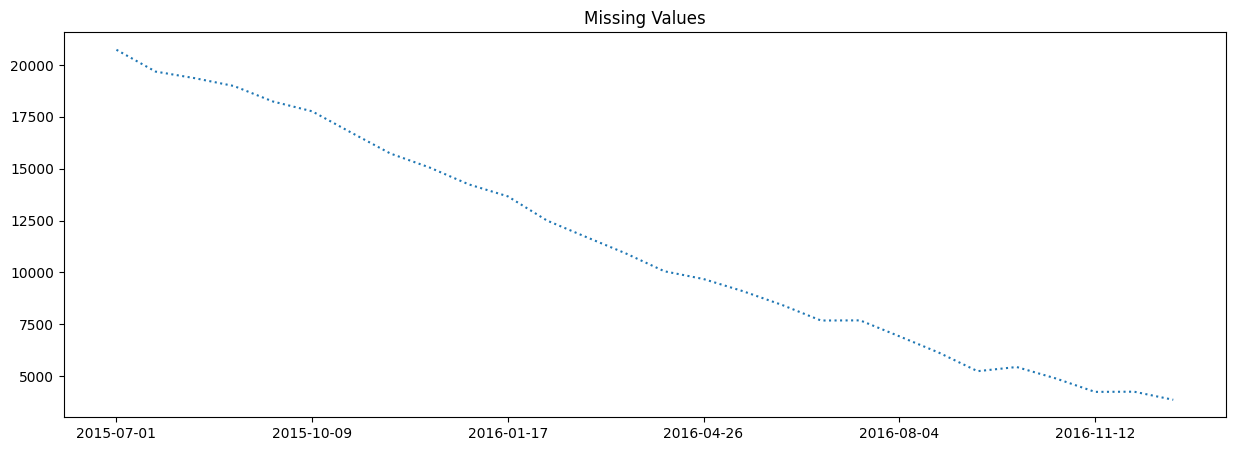

In [13]:
# Check for missing values
plt.figure(figsize=(15, 5))
data.isna().sum()[indexes].plot(linestyle='dotted').set_title('Missing Values')
plt.show()

From above plot , we can observe that with time , null values are decreasing.
Recent dates have lesser null values, which means newer pages will have no data of prior to that page hosting date.

In [14]:
data.fillna(0,inplace =True)   # We'll replace the null values with 0

In [15]:
data[indexes].isna().sum()    # No missing values are observed for our indexes

,0
2015-07-01,0
2015-07-21,0
2015-08-10,0
2015-08-30,0
2015-09-19,0
2015-10-09,0
2015-10-29,0
2015-11-18,0
2015-12-08,0
2015-12-28,0


### **Extracting Language**

In [16]:
data.loc[0, "Page"]

'2NE1_zh.wikipedia.org_all-access_spider'

In [17]:
import re

re.findall(r'_(.{2}).wikipedia.org_', "2NE1_zh.wikipedia.org_all-access_spider")

['zh']

In [18]:
data["Page"].str.findall(pat="_(.{2}).wikipedia.org_").sample(10)

,Page
76695,[en]
92752,[es]
44336,[]
100110,[ru]
46743,[de]
61346,[zh]
96231,[es]
81680,[]
319,[zh]
51319,[fr]


In [19]:
def extract_language(name):
  if len(re.findall(r'_(.{2}).wikipedia.org_', name)) == 1 :
    return re.findall(r'_(.{2}).wikipedia.org_', name)[0]
  else:
    return 'Unknown'

In [20]:
data["Language"] = data["Page"].map(extract_language)

In [21]:
data["Language"].unique()

array(['zh', 'fr', 'en', 'Unknown', 'ru', 'de', 'ja', 'es'], dtype=object)

In [22]:
dict_ ={'de':'German',
 'en':'English',
 'es': 'Spanish',
 'fr': 'French',
 'ja': 'Japenese' ,
 'ru': 'Russian',
 'zh': 'Chinese',
 'Unknown': 'Unknown_Language'}

data["Language"] = data["Language"].map(dict_)            # Let's create a dictionary of all the abbreviations along with the actual language names for all the visible languages

In [23]:
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,Chinese
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,Chinese
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,Chinese
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,Chinese
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,Chinese


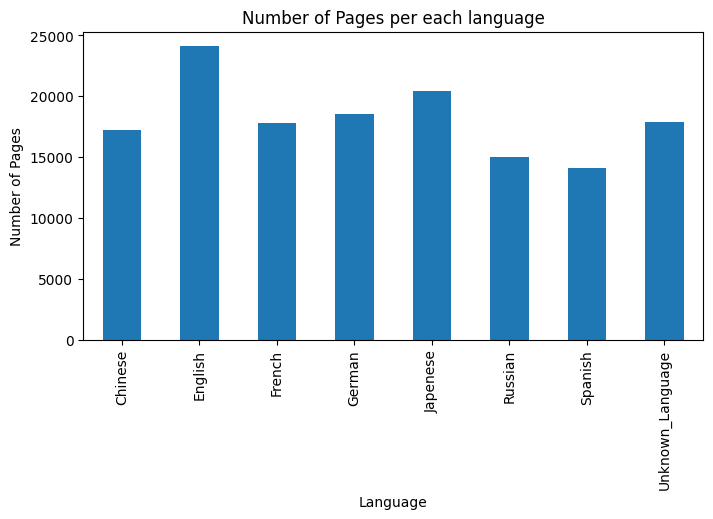

In [24]:
plt.figure(figsize=(8, 4))
data.groupby("Language")["Page"].count().plot(kind="bar")
plt.xlabel("Language")
plt.ylabel("Number of Pages")
plt.title("Number of Pages per each language")
plt.show()

In [25]:
from locale import normalize

data["Language"].value_counts(normalize=True) * 100               # Let's look at the proportions of each language data that we have

,proportion
Language,
English,16.618986
Japenese,14.084225
German,12.785479
Unknown_Language,12.308445
French,12.271909
Chinese,11.876909
Russian,10.355501
Spanish,9.698545


16.61 % of all pages are in English which is the highest.

12.30 % of pages have unknown language.



### **Extracting Access Type**

In [26]:
data["Access_Type"] = data["Page"].str.findall(r'all-access|mobile-web|desktop').apply(lambda x: x[0] if len(x) == 1 else 'Unknown')

In [27]:
data["Access_Type"].value_counts(dropna=False, normalize=True)

,proportion
Access_Type,
all-access,0.512295
mobile-web,0.247748
desktop,0.239958


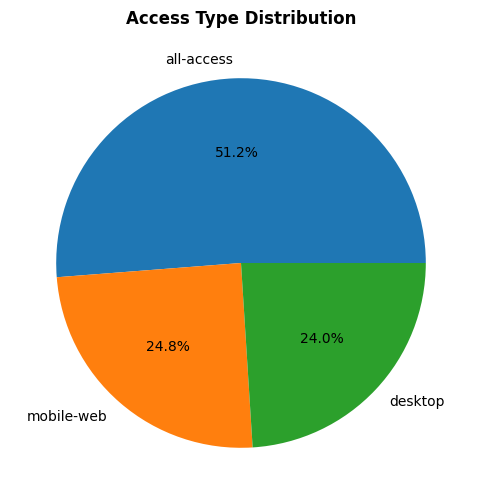

In [28]:
x = (data["Access_Type"].value_counts(dropna=False, normalize=True) * 100).values
y = (data["Access_Type"].value_counts(dropna=False, normalize=True) * 100).index

plt.figure(figsize=(8, 6))
plt.pie(x, labels=y, autopct='%1.1f%%')
plt.title('Access Type Distribution', fontweight='bold')
plt.show()

### **Extracting Access Origin**

In [29]:
data["Page"].sample(10)

,Page
10456,Suits_(season_6)_en.wikipedia.org_desktop_all-...
103845,Первая_чеченская_война_ru.wikipedia.org_deskto...
71028,Juegos_tradicionales_es.wikipedia.org_desktop_...
81404,File:PaszportRzeczpospolitaPolska.1931.jpg_com...
74264,Narcissism_en.wikipedia.org_mobile-web_all-agents
73818,John_F._Kennedy_Jr._en.wikipedia.org_mobile-we...
144040,Federico_García_Lorca_es.wikipedia.org_all-acc...
71569,Club_Atlético_de_Madrid_es.wikipedia.org_deskt...
127361,Чудо_на_Гудзоне_(фильм)_ru.wikipedia.org_all-a...
142277,Jamsa_es.wikipedia.org_all-access_spider


In [30]:
data.Page.str.findall(r'spider|agents').apply(lambda x:x[0]).isna().sum()

0

In [31]:
data["Access_Origin"] = data.Page.str.findall(r'spider|agents').apply(lambda x:x[0])

In [32]:
data["Access_Origin"].value_counts(dropna= False, normalize=True) * 100


,proportion
Access_Origin,
agents,75.932526
spider,24.067474


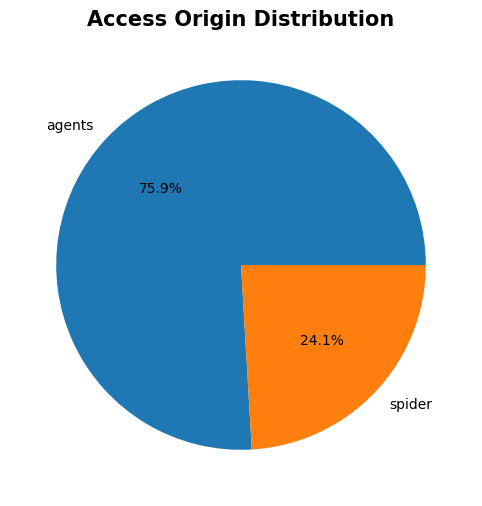

In [33]:
x = (data["Access_Origin"].value_counts(dropna= False, normalize=True) * 100).values
y = (data["Access_Origin"].value_counts(dropna= False, normalize=True) * 100).index

plt.figure(figsize=(8, 6))
plt.pie(x, labels=y, autopct='%1.1f%%')
plt.title('Access Origin Distribution', fontsize = 15, fontweight = 'bold')
plt.show()

In [34]:
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language,Access_Type,Access_Origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,Chinese,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,Chinese,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,Chinese,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,Chinese,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,3.0,11.0,27.0,13.0,36.0,10.0,Chinese,all-access,spider


In [35]:
indexes

array(['2015-07-01', '2015-07-21', '2015-08-10', '2015-08-30',
       '2015-09-19', '2015-10-09', '2015-10-29', '2015-11-18',
       '2015-12-08', '2015-12-28', '2016-01-17', '2016-02-06',
       '2016-02-26', '2016-03-17', '2016-04-06', '2016-04-26',
       '2016-05-16', '2016-06-05', '2016-06-25', '2016-07-15',
       '2016-08-04', '2016-08-24', '2016-09-13', '2016-10-03',
       '2016-10-23', '2016-11-12', '2016-12-02', '2016-12-22'],
      dtype=object)

In [36]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# Perform the groupby and mean calculation on numeric columns
data.groupby("Language")[numeric_columns].mean()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Language,,,,,,,,,,,,,,,,,,,,,
Chinese,240.582042,240.941958,239.344071,241.653491,257.779674,259.114864,258.832260,265.589529,263.964420,274.414592,...,345.165129,340.420338,360.738580,381.322886,376.447443,376.019618,378.048639,350.719427,354.704452,365.579256
English,3513.862203,3502.511407,3325.357889,3462.054256,3575.520035,3849.736021,3643.523063,3437.871080,3517.459391,3497.571594,...,4997.991248,4683.314294,4971.831757,5140.463373,5770.371661,6040.680728,5860.227559,6245.127510,5201.783018,5127.916418
French,475.150994,478.202000,459.837659,491.508932,482.557746,502.741209,485.945399,476.998820,472.061903,445.495057,...,652.004719,639.459443,618.215931,666.639085,936.884788,858.413100,774.155769,752.712954,700.543422,646.258342
German,714.968405,705.229741,676.877231,621.145145,722.076185,794.832480,770.814256,782.077641,752.939990,701.702593,...,828.738017,839.025934,810.756187,1281.088532,1206.478029,1085.095379,1032.640804,994.657141,949.265649,893.013425
Japenese,580.647056,666.672801,602.289805,756.509177,725.720914,632.399148,615.184181,611.462337,596.067642,619.299300,...,675.104792,968.007733,856.605012,818.374725,779.114728,789.158680,790.500465,865.483236,952.018354,1197.239440
Russian,629.999601,640.902876,594.026295,558.728132,595.029157,640.986287,626.293436,623.360205,638.550726,731.252297,...,896.352017,884.841299,874.274597,1120.990347,1112.840833,1001.209426,931.987685,897.282452,803.271868,880.244508
Spanish,1085.972919,1037.814557,954.412680,896.050750,974.508210,1110.637145,1082.568342,1050.669557,1030.841282,937.129931,...,983.568129,935.082522,880.307911,903.643685,1195.481626,1133.367901,1178.290923,1112.171085,821.671405,787.399531
Unknown_Language,83.479922,87.471857,82.680538,70.572557,78.214562,89.720190,94.939457,99.096724,86.445477,87.353906,...,131.521983,164.889051,140.363764,164.455167,165.821563,147.038925,186.438029,147.297004,164.540577,143.951442


In [37]:
pd.set_option('display.max_rows', 500)

In [38]:
aggregated_data = data.groupby("Language")[numeric_columns].mean().T.drop("Unknown_Language",axis = 1).reset_index()
aggregated_data["index"] = pd.to_datetime(aggregated_data["index"])
aggregated_data = aggregated_data.set_index("index")
aggregated_data

Language,Chinese,English,French,German,Japenese,Russian,Spanish
index,,,,,,,
2015-07-01,240.582042,3513.862203,475.150994,714.968405,580.647056,629.999601,1085.972919
2015-07-02,240.941958,3502.511407,478.202000,705.229741,666.672801,640.902876,1037.814557
2015-07-03,239.344071,3325.357889,459.837659,676.877231,602.289805,594.026295,954.412680
2015-07-04,241.653491,3462.054256,491.508932,621.145145,756.509177,558.728132,896.050750
2015-07-05,257.779674,3575.520035,482.557746,722.076185,725.720914,595.029157,974.508210
...,...,...,...,...,...,...,...
2016-12-27,376.019618,6040.680728,858.413100,1085.095379,789.158680,1001.209426,1133.367901
2016-12-28,378.048639,5860.227559,774.155769,1032.640804,790.500465,931.987685,1178.290923
2016-12-29,350.719427,6245.127510,752.712954,994.657141,865.483236,897.282452,1112.171085


In [39]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Chinese   550 non-null    float64
 1   English   550 non-null    float64
 2   French    550 non-null    float64
 3   German    550 non-null    float64
 4   Japenese  550 non-null    float64
 5   Russian   550 non-null    float64
 6   Spanish   550 non-null    float64
dtypes: float64(7)
memory usage: 34.4 KB


In [40]:
aggregated_data.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='index', length=550, freq=None)

### **Visualising Time Series for each languages**

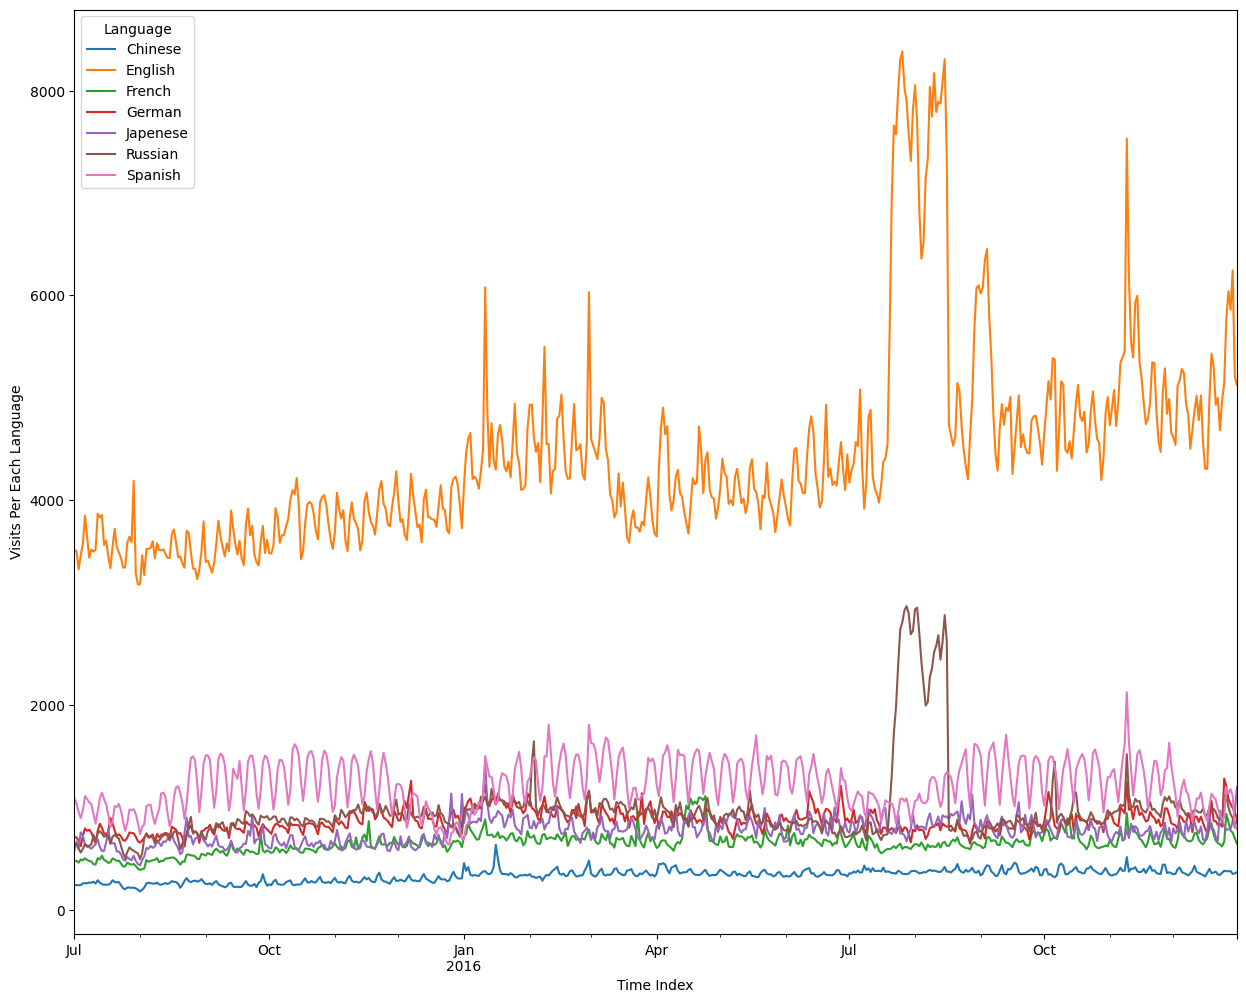

In [41]:
plt.rcParams['figure.figsize'] = (15, 12)
aggregated_data.plot()
plt.xlabel("Time Index")
plt.ylabel("Visits Per Each Language")
plt.show()

As per plot, english language is most visited language w.r.t time index. In month of July to
September it is in at its peak.

### **Hypothesis Testing : If Time Series is Stationary or Trending**



*   Null Hypothesis: The series is Non-Stationary
*   Alternative Hypothesis: The series is Stationary

significance value : 0.05 (alpha)

if p-value > 0.05 : we failed to reject Null hypothesis:
That means the series is Non-Stationary.

if p-value <= 0.05: we reject Null Hypothesis
that means the time series in Stationary



In [42]:
import statsmodels.api as sm

def Dickey_Fuller_test(ts,significance_level = 0.05):
 p_value = sm.tsa.stattools.adfuller(ts)[1]

 if p_value <= significance_level:
  print("Time Series is Stationary")
  print("P_value is: ", p_value)
 else:
  print("Time Series is Not Stationary")
  print("P_value is: ", p_value)

In [43]:
for Language in aggregated_data.columns:
 print(Language)
 print(Dickey_Fuller_test(aggregated_data[Language],significance_level = 0.05))
 print("\n")

Chinese
Time Series is Not Stationary
P_value is:  0.4474457922931142
None


English
Time Series is Not Stationary
P_value is:  0.18953359279992404
None


French
Time Series is Not Stationary
P_value is:  0.05149502195245795
None


German
Time Series is Not Stationary
P_value is:  0.14097382319729534
None


Japenese
Time Series is Not Stationary
P_value is:  0.10257133898557641
None


Russian
Time Series is Stationary
P_value is:  0.0018649376536617886
None


Spanish
Time Series is Stationary
P_value is:  0.033588590844791
None




Based on DickeyFuller test of Stationarity , we can observe Spanish and Russian languages Pages visits Time series are stationary.

Chinese, English , German , Japanese and French are not stationary.

### **Analysing Time Series for English Language Pages Visits**

In [44]:
aggregated_data

Language,Chinese,English,French,German,Japenese,Russian,Spanish
index,,,,,,,
2015-07-01,240.582042,3513.862203,475.150994,714.968405,580.647056,629.999601,1085.972919
2015-07-02,240.941958,3502.511407,478.202000,705.229741,666.672801,640.902876,1037.814557
2015-07-03,239.344071,3325.357889,459.837659,676.877231,602.289805,594.026295,954.412680
2015-07-04,241.653491,3462.054256,491.508932,621.145145,756.509177,558.728132,896.050750
2015-07-05,257.779674,3575.520035,482.557746,722.076185,725.720914,595.029157,974.508210
...,...,...,...,...,...,...,...
2016-12-27,376.019618,6040.680728,858.413100,1085.095379,789.158680,1001.209426,1133.367901
2016-12-28,378.048639,5860.227559,774.155769,1032.640804,790.500465,931.987685,1178.290923
2016-12-29,350.719427,6245.127510,752.712954,994.657141,865.483236,897.282452,1112.171085


In [45]:
TS_English = aggregated_data["English"]

def adf_test(timeseries):
 print ('Results of Dickey-Fuller Test:')

 dftest = sm.tsa.stattools.adfuller(timeseries, autolag='AIC')
 df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used', 'Number of Observations Used', 'Critical Value (1%)', 'Critical Value (5%)', 'Critical Value (10%)'])
 for key, value in dftest[4].items():
   df_output['Critical Value (%s)' %key] = value
 print (df_output)

In [46]:
Dickey_Fuller_test(TS_English)

Time Series is Not Stationary
P_value is:  0.18953359279992404


### **Visualising English-Language Page Visits Time Series manually to identify seasonality and period**

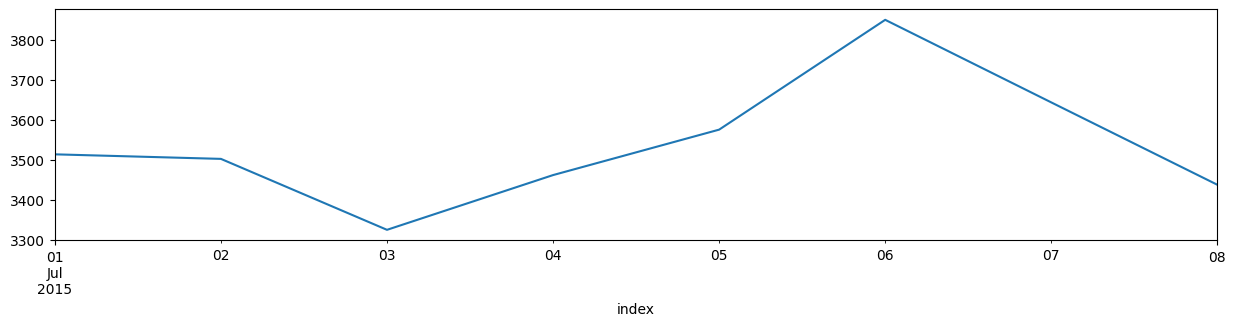

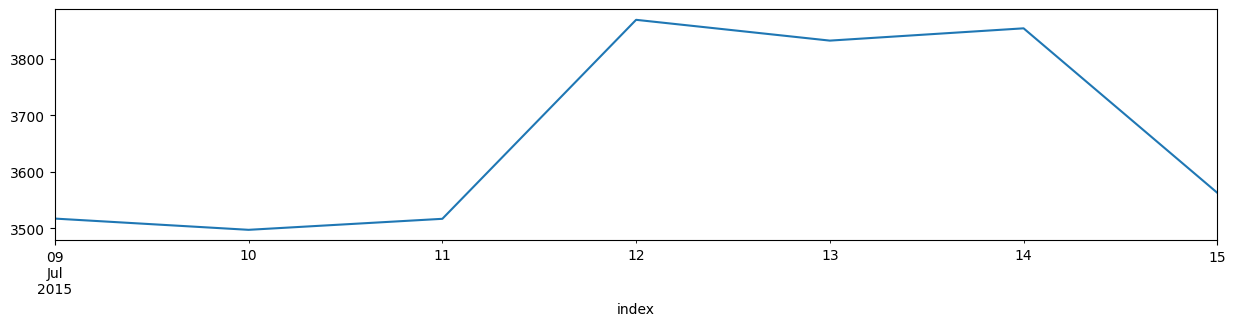

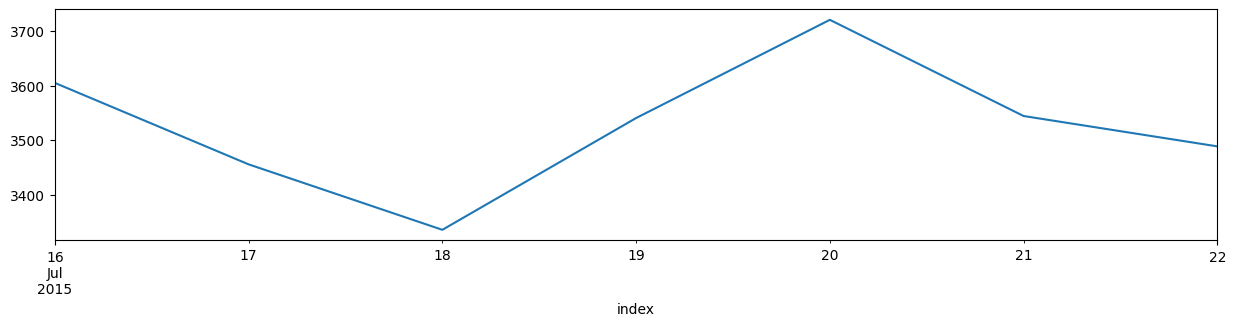

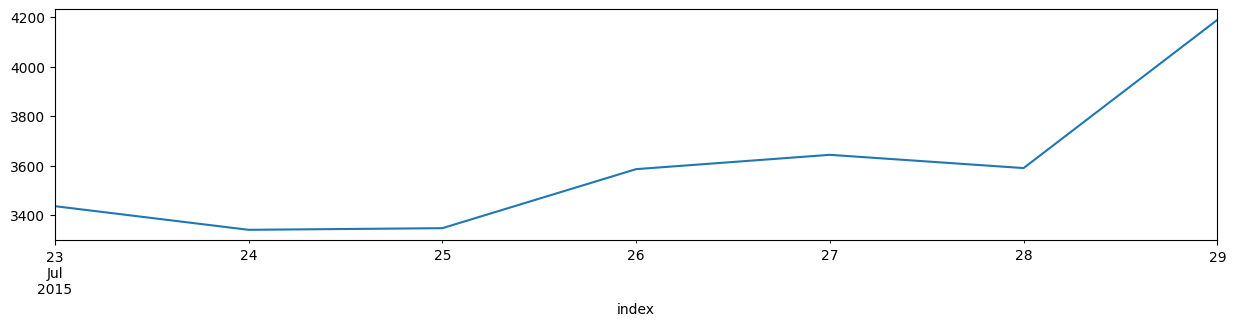

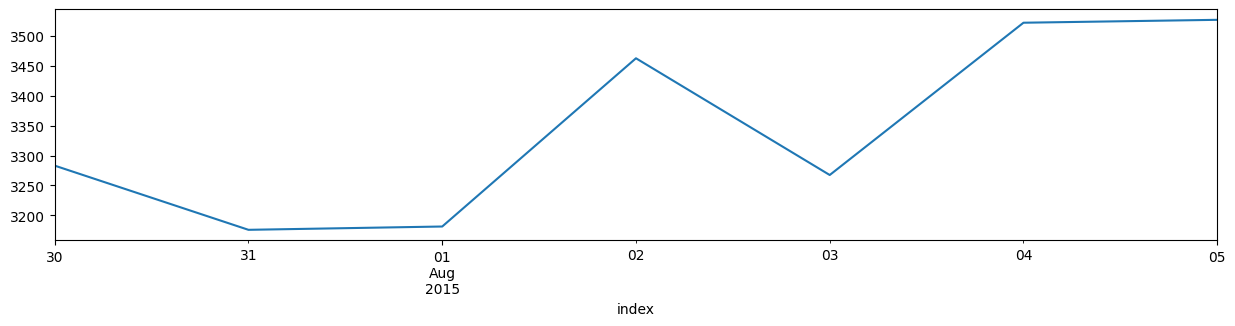

In [47]:
plt.rcParams['figure.figsize'] = (15, 3)

TS_English[:8].plot()
plt.show()

TS_English[8:15].plot()
plt.show()

TS_English[15:22].plot()
plt.show()

TS_English[22:29].plot()
plt.show()

TS_English[29:36].plot()
plt.show()


In [48]:
correlations = []
for lag in range(1,30):
  present = TS_English[:-lag]
  past = TS_English.shift(-lag)[:-lag]
  corrs = np.corrcoef(present,past)[0][-1]
  print(lag,corrs)
  correlations.append(corrs)

1 0.9363434527458435
2 0.8682966716039896
3 0.8185418037184544
4 0.7846718829500342
5 0.7612561076942573
6 0.7542260641783559
7 0.7386829287516693
8 0.6912638018189877
9 0.6370978014300401
10 0.6015277501876303
11 0.5825450402423571
12 0.5812931934793534
13 0.6007266462817789
14 0.6142525351445116
15 0.5971084554755528
16 0.5693834937428246
17 0.5488401467532626
18 0.5377431132136109
19 0.5430816743411203
20 0.5552694244923043
21 0.5540623423718063
22 0.5092655604869363
23 0.45373695576813583
24 0.4112336297620323
25 0.38162860616251737
26 0.3651996316699481
27 0.3723603627302601
28 0.37818226683160033
29 0.35939242667328175


### **Time Series Decomposition**

Y(t) = seasonality S(t) + trend T(t) + residuals R(t)


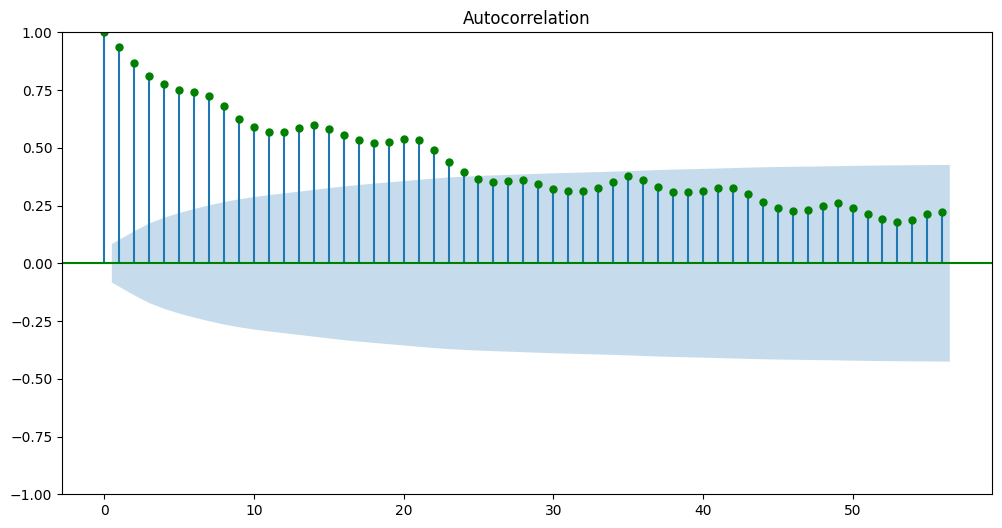

In [49]:
# using auto correlation function plot , to varify the period
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 6)
plot_acf(TS_English, lags=56, color='green');

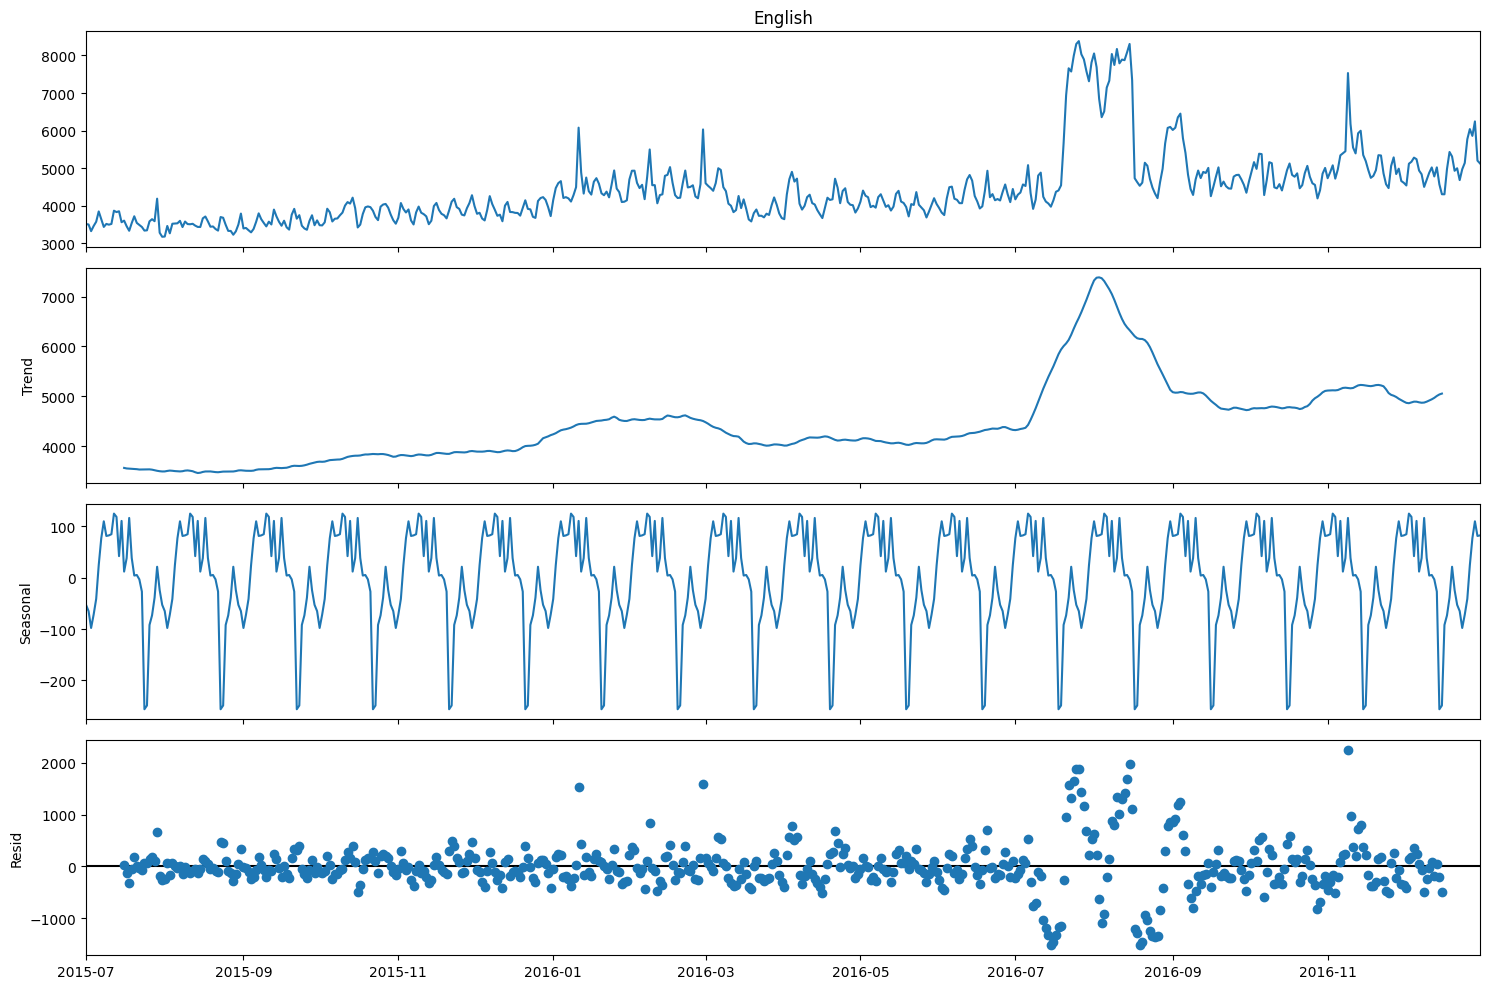

In [50]:
plt.rcParams['figure.figsize'] = (15, 10)

Decomposition_model = sm.tsa.seasonal_decompose(TS_English, model='additive', period=30)
Decomposition_model.plot();

In [51]:
Dickey_Fuller_test(pd.Series(Decomposition_model.resid).fillna(0))

Time Series is Stationary
P_value is:  4.998562656030402e-09


<Axes: xlabel='index'>

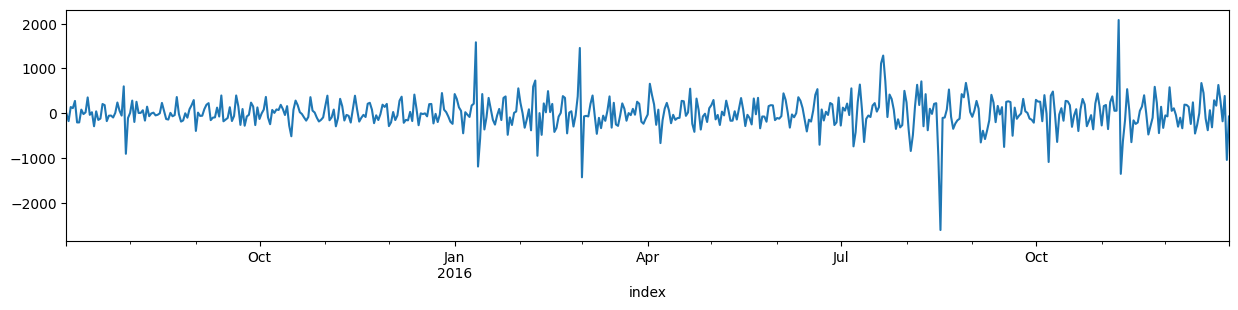

In [52]:
# Taking the first differentiation of the time series and plotting

plt.rcParams['figure.figsize'] = (15, 3)
TS_English.diff(1).dropna().plot()

In [53]:
Dickey_Fuller_test(TS_English.diff(1).dropna())

Time Series is Stationary
P_value is:  5.292474635436075e-13


After 1 differentiation, time series becomes stationary.

Thus for ARIMA models , we can set d = 1


In [54]:
from sklearn.metrics import (mean_squared_error as mse,  mean_absolute_error as mae, mean_absolute_percentage_error as mape)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
 print('MAE :', round(mae(actual, predicted), 3))
 print('RMSE :', round(mse(actual, predicted)**0.5, 3))
 print('MAPE:', round(mape(actual, predicted), 3))

### **Forecasting**

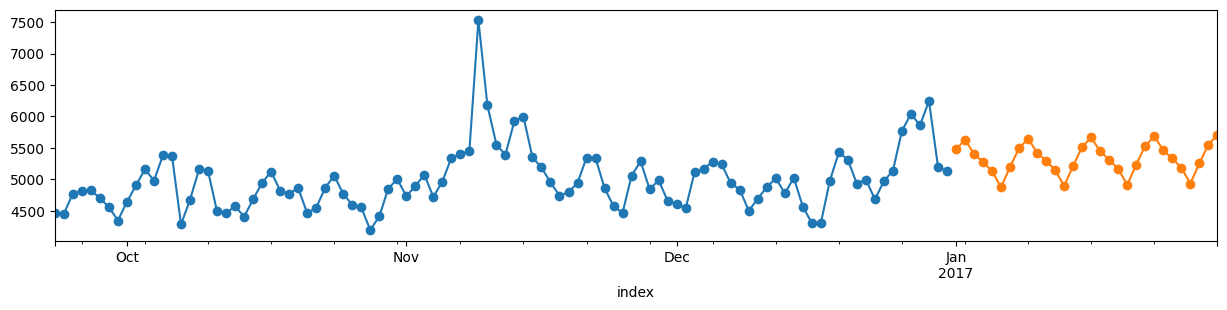

In [55]:
TS_English.index.freq = 'D'
model = sm.tsa.ExponentialSmoothing(TS_English, seasonal='add',trend="add")
model = model.fit()

TS_English.tail(100).plot(style='-o', label='actual')
model.forecast(30).plot(style='-o', label='predicted')
plt.show()

MAE : 394.976
RMSE : 563.349
MAPE: 0.073


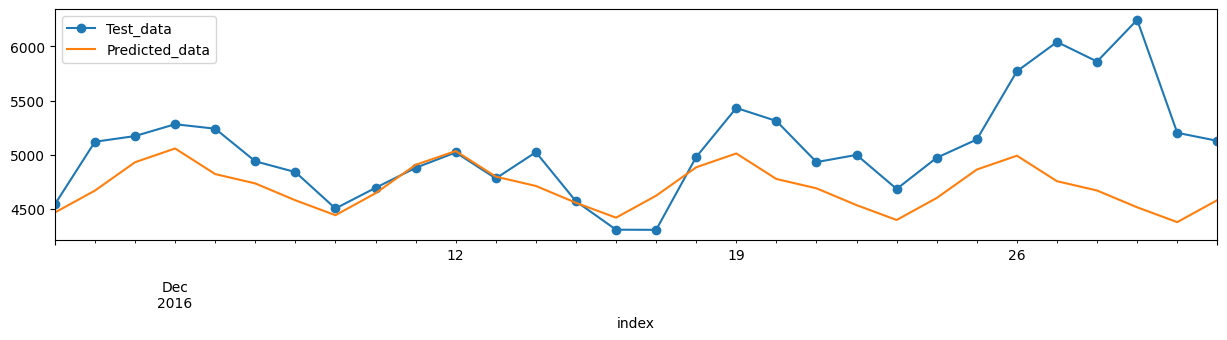

In [56]:
X_train = TS_English.loc[TS_English.index < TS_English.index[-30] ].copy()
X_test = TS_English.loc[TS_English.index >= TS_English.index[-30] ].copy()

import warnings # supress warnings
warnings.filterwarnings('ignore')

model = sm.tsa.ExponentialSmoothing(X_train, trend="add", damped_trend="add", seasonal="add")
model = model.fit(smoothing_level=None, # alpha
                  smoothing_trend=None, # beta
                  smoothing_seasonal=None) # gama)

# X_test.plot()
Pred = model.forecast(steps=30)
performance(X_test,Pred)

X_test.plot(style="-o",label ="Test_data")
Pred.plot(label="Predicted_data")

plt.legend()
plt.show()

### **ARIMA**

*   Autoregressive Integrated Moving Average (ARIMA) model, and extensions
*   This model is the basic interface for ARIMA-type models, including those with exogenous regressors and those with seasonal components. The most general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows all specialized cases, including autoregressive models: AR(p)


moving average models: MA(q)

mixed autoregressive moving average models: ARMA(p, q)

integration models: ARIMA(p, d, q)

seasonal models: SARIMA(P, D, Q, s)

regression with errors that follow one of the above ARIMA-type models

In [57]:
from statsmodels.tsa.arima.model import ARIMA
TS = TS_English.copy(deep=True)

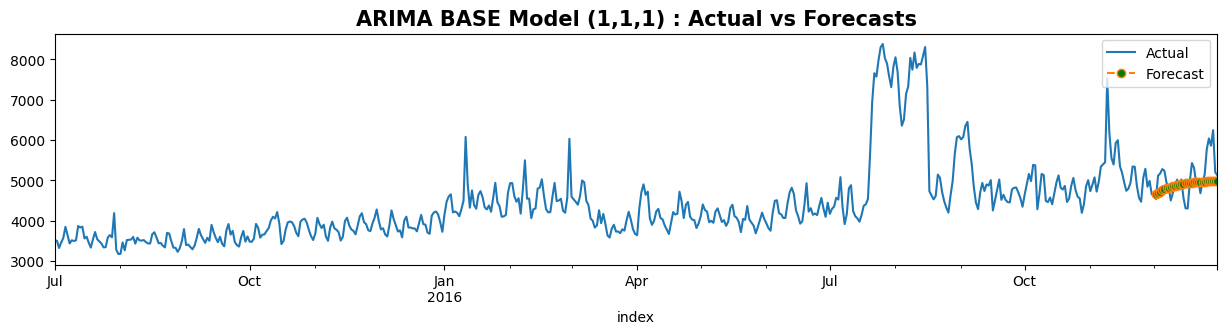



MAPE of Model : 0.06585
RMSE of Model : 472.186


In [58]:
n_forecast = 30
model = ARIMA(TS[:-n_forecast],order = (1,1,1))
model = model.fit()
predicted = model.forecast(steps= n_forecast, alpha = 0.05)

TS.plot(label = 'Actual')
predicted.plot(label = 'Forecast', linestyle='dashed', marker='o', markerfacecolor='g')

plt.legend(loc="upper right")
plt.title('ARIMA BASE Model (1,1,1) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()

#Calculating MAPE & RMSE
actuals = TS.values[-n_forecast:]
errors = TS.values[-n_forecast:] - predicted.values

mape = np.mean(np.abs(errors)/ np.abs(actuals))
rmse = np.sqrt(np.mean(errors**2))

print("\n")
print(f'MAPE of Model : {np.round(mape,5)}')
print(f'RMSE of Model : {np.round(rmse,3)}')


### **SARIMAX model**

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarimax_model(time_series, n, p=0, d=0, q=0, P=0, D=0, Q=0, s=0, exog = []):

 #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s)
 model = SARIMAX(time_series[:-n], order =(p,d,q), seasonal_order=(P, D, Q, s), exog = exog[:-n], initialization='approximate_diffuse')
 model_fit = model.fit()

 #Creating forecast for last n-values
 model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))

 #plotting Actual & Forecasted values
 plt.figure(figsize = (20,8))
 time_series[-60:].plot(label = 'Actual')
 model_forecast[-60:].plot(label = 'Forecast', color = 'red', linestyle='dashed', marker='o', markerfacecolor='green')
 plt.legend(loc="upper right")
 plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts')
 plt.show()

 #Calculating MAPE & RMSE
 actuals = time_series.values[-n:]
 errors = time_series.values[-n:] - model_forecast.values
 mape = np.mean(np.abs(errors)/ np.abs(actuals))

 rmse = np.sqrt(np.mean(errors**2))

 print()
 print(f'MAPE of Model : {np.round(mape,5)}')
 print(f'RMSE of Model : {np.round(rmse,3)}')

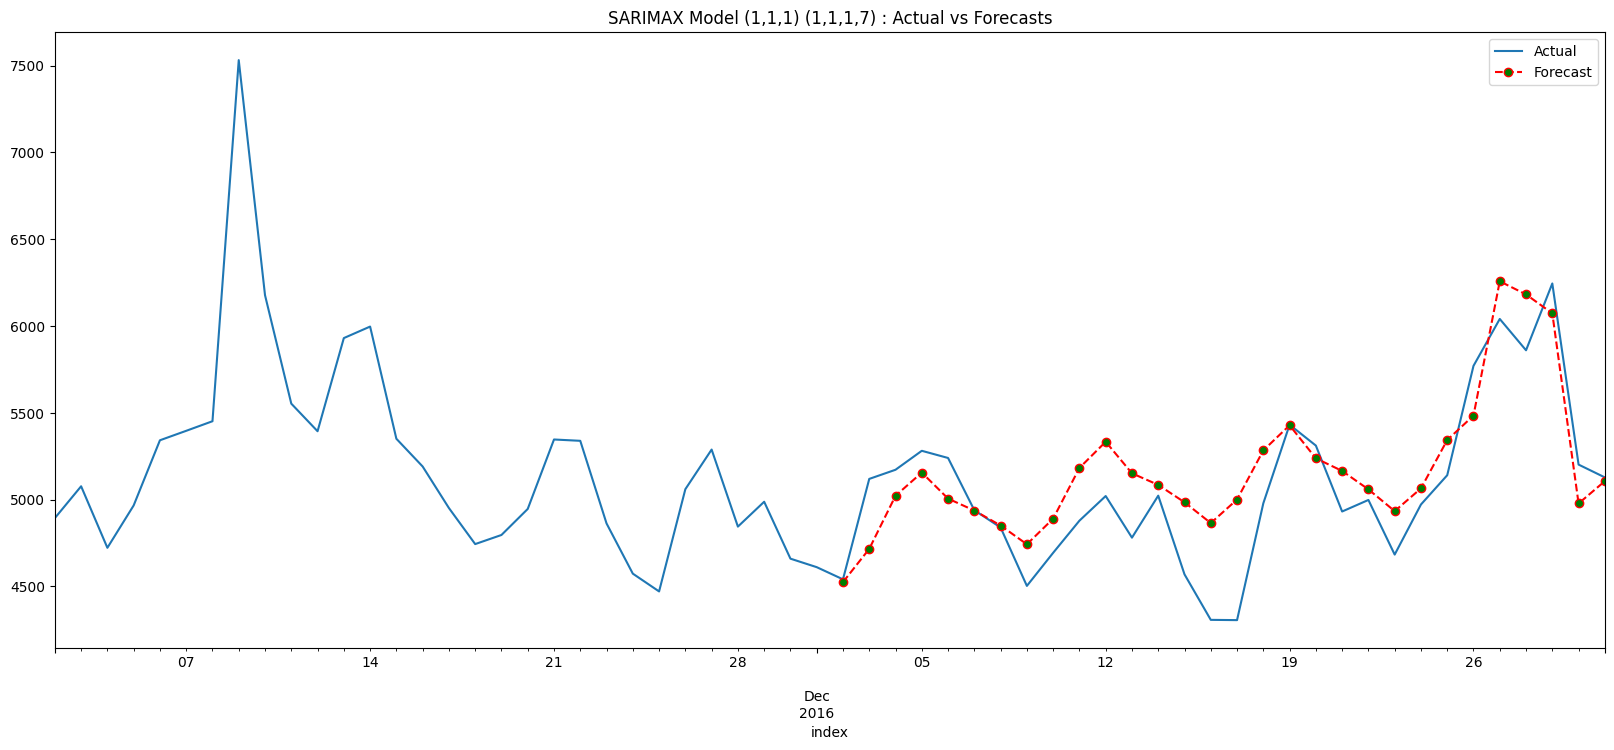


MAPE of Model : 0.04453
RMSE of Model : 272.731


In [60]:
exog = campaign_data['Exog'].to_numpy()
time_series = aggregated_data.English
test_size= 0.1
p,d,q, P,D,Q,s = 1,1,1,1,1,1,7
n = 30
sarimax_model(time_series, n, p=p, d=d, q=q, P=P, D=D, Q=Q, s=s, exog = exog)

### **Hyperparamer tuning for SARIMAX model**

In [61]:
def SARIMAX_grid_search(time_series, n, param, d_param, s_param, exog=[]):
 counter = 0
 param_df = pd.DataFrame(columns=['serial', 'pdq', 'PDQs', 'mape', 'rmse'])
 for p in param:
    for d in d_param:
      for q in param:
        for P in param:
          for D in d_param:
            for Q in param:
              for s in s_param:
                try:
                  model = SARIMAX(time_series[:-n], order=(p, d, q), seasonal_order=(P, D, Q, s), exog=exog[:-n])
                  model_fit = model.fit()

                  model_forecast = model_fit.forecast(n, dynamic=True, exog=pd.DataFrame(exog[-n:]))

                  actuals = time_series.values[-n:]
                  errors = time_series.values[-n:] - model_forecast.values

                  mape = np.mean(np.abs(errors) / np.abs(actuals))
                  rmse = np.sqrt(np.mean(errors ** 2))
                  mape = np.round(mape, 5)
                  rmse = np.round(rmse, 3)

                  counter += 1
                  list_row = [counter, (p, d, q), (P, D, Q, s), mape, rmse]
                  param_df.loc[len(param_df)] = list_row
                  print(f'Possible Combination: {counter} out of {len(param) * len(d_param) * len(param) * len(param) * len(d_param) * len(param) * len(s_param)}')
                except:
                  continue

 return param_df

In [62]:
#Finding best parameters for English time series
exog = campaign_data['Exog'].to_numpy()
time_series = aggregated_data.English
n = 30
param = [0,1,2]
d_param = [0,1]
s_param = [1]
english_params = SARIMAX_grid_search(time_series, n, param, d_param,s_param, exog)

In [63]:
english_params.sort_values(['mape', 'rmse']).head()

,serial,pdq,PDQs,mape,rmse


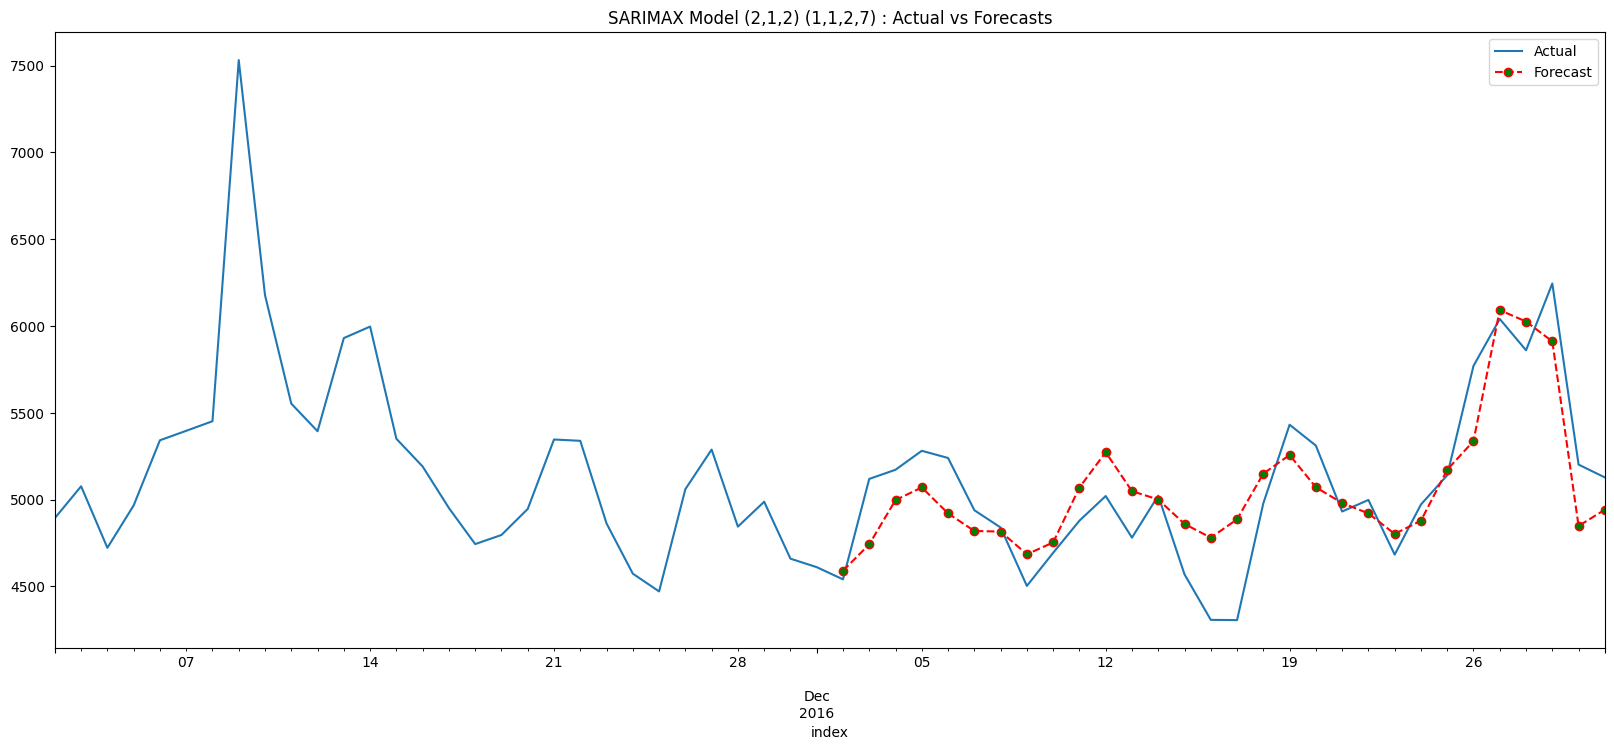


MAPE of Model : 0.04054
RMSE of Model : 246.918


In [64]:
exog = campaign_data['Exog'].to_numpy()
time_series = aggregated_data.English
test_size= 0.1
p,d,q, P,D,Q,s = 2,1,2,1,1,2,7
n = 30
sarimax_model(time_series, n, p=p, d=d, q=q, P=P, D=D, Q=Q, s=s, exog = exog)

### **Hyperparameter tuning for all other languages**

In [65]:
def pipeline_sarimax_grid_search_without_exog(languages, data, n, param, d_param, s_param):

  best_param_df = pd.DataFrame(columns = ['language','p','d', 'q', 'P','D','Q','s', 'mape'])
  for lang in languages:
      print('')
      print('')
      print(f'--------------------------------------------------------------')
      print(f' Finding best parameters for {lang} ')
      print(f'--------------------------------------------------------------')
      counter = 0
      time_series = data[lang]
      best_mape = 100

      #Creating loop for every paramater to fit SARIMAX model
      for p in param:
        for d in d_param:
          for q in param:
            for P in param:
              for D in d_param:
                for Q in param:
                  for s in s_param:
                    #Creating Model
                    model = SARIMAX(time_series[:-n], order=(p,d,q), seasonal_order=(P, D, Q, s), initialization='approximate_diffuse')
                    model_fit = model.fit()

                    #Creating forecast from Model
                    model_forecast = model_fit.forecast(n, dynamic = True)

                    #Calculating errors for results
                    actuals = time_series.values[-n:]
                    errors = time_series.values[-n:] - model_forecast.values

                    #Calculating MAPE & RMSE
                    mape = np.mean(np.abs(errors)/ np.abs(actuals))

                    counter += 1

                    if (mape < best_mape):
                      best_mape = mape
                      best_p = p
                      best_d = d
                      best_q = q
                      best_P = P
                      best_D = D
                      best_Q = Q
                      best_s = s
                    else: pass


            #print statement to check progress of Loop
            print(f'Possible Combination: {counter} out of {(len(param)**4) * (len(d_param)**2) * (len(param)**4) * (len(d_param)**2) * (len(param)**4) * (len(s_param))}')

      best_mape = np.round(best_mape, 5)
      print(f'--------------------------------------------------------------')
      print(f'Minimum MAPE for {lang} = {best_mape}')
      print(f'Corresponding Best Parameters are {best_p , best_d, best_q, best_P, best_D, best_Q, best_s}')
      print(f'--------------------------------------------------------------')

      best_param_row = [lang, best_p, best_d, best_q, best_P, best_D, best_Q, best_s, best_mape]
      best_param_df.loc[len(best_param_df)] = best_param_row

  return best_param_df


In [66]:
languages = aggregated_data.columns
n = 30
param = [0,1,0]
d_param = [0,1]
s_param = [2]
best_param_df = pipeline_sarimax_grid_search_without_exog(languages, aggregated_data, n, param, d_param, s_param)



--------------------------------------------------------------
 Finding best parameters for Chinese 
--------------------------------------------------------------
Possible Combination: 18 out of 8503056
Possible Combination: 36 out of 8503056
Possible Combination: 54 out of 8503056
Possible Combination: 72 out of 8503056
Possible Combination: 90 out of 8503056
Possible Combination: 108 out of 8503056
Possible Combination: 126 out of 8503056
Possible Combination: 144 out of 8503056
Possible Combination: 162 out of 8503056
Possible Combination: 180 out of 8503056
Possible Combination: 198 out of 8503056
Possible Combination: 216 out of 8503056
Possible Combination: 234 out of 8503056
Possible Combination: 252 out of 8503056
Possible Combination: 270 out of 8503056
Possible Combination: 288 out of 8503056
Possible Combination: 306 out of 8503056
Possible Combination: 324 out of 8503056
--------------------------------------------------------------
Minimum MAPE for Chinese = 0.04482
Cor

In [67]:
best_param_df

,language,p,d,q,P,D,Q,s,mape
0,Chinese,0,1,0,1,0,1,2,0.04482
1,English,1,1,1,1,0,0,2,0.06620
2,French,1,1,1,0,1,1,2,0.07522
3,German,0,1,0,1,0,1,2,0.08235
4,Japenese,1,1,0,0,1,1,2,0.07913
5,Russian,0,0,0,1,0,1,2,0.05075
6,Spanish,0,0,1,1,0,0,2,0.10847


In [68]:
best_param_df.sort_values(['mape'], inplace = True)
best_param_df

,language,p,d,q,P,D,Q,s,mape
0,Chinese,0,1,0,1,0,1,2,0.04482
5,Russian,0,0,0,1,0,1,2,0.05075
1,English,1,1,1,1,0,0,2,0.06620
2,French,1,1,1,0,1,1,2,0.07522
4,Japenese,1,1,0,0,1,1,2,0.07913
3,German,0,1,0,1,0,1,2,0.08235
6,Spanish,0,0,1,1,0,0,2,0.10847


In [69]:
def plot_best_SARIMAX_model(languages, data, n, best_param_df):

 for lang in languages:
    #fetching respective best parameters for that language
    p = best_param_df.loc[best_param_df['language'] == lang, ['p']].values[0][0]
    d = best_param_df.loc[best_param_df['language'] == lang, ['d']].values[0][0]
    q = best_param_df.loc[best_param_df['language'] == lang, ['q']].values[0][0]
    P = best_param_df.loc[best_param_df['language'] == lang, ['P']].values[0][0]
    D = best_param_df.loc[best_param_df['language'] == lang, ['D']].values[0][0]
    Q = best_param_df.loc[best_param_df['language'] == lang, ['Q']].values[0][0]
    s = best_param_df.loc[best_param_df['language'] == lang, ['s']].values[0][0]

    #Creating language time-series
    time_series = data[lang]

    #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s)
    model = SARIMAX(time_series[:-n],
    order =(p,d,q),
    seasonal_order=(P, D, Q, s),
    initialization='approximate_diffuse')
    model_fit = model.fit()

    #Creating forecast for last n-values
    model_forecast = model_fit.forecast(n, dynamic = True)

    #Calculating MAPE & RMSE
    actuals = time_series.values[-n:]
    errors = time_series.values[-n:] - model_forecast.values
    mape = np.mean(np.abs(errors)/ np.abs(actuals))
    rmse = np.sqrt(np.mean(errors**2))

    print('')
    print('')
    print(f'--------------------------------------------------------------------')
    print(f' SARIMAX model for {lang} Time Series')
    print(f' Parameters of Model : ({p},{d},{q}) ({P},{D},{Q},{s})')
    print(f' MAPE of Model : {np.round(mape,5)}')
    print(f' RMSE of Model : {np.round(rmse,3)}')
    print(f'--------------------------------------------------------------------')

    #plotting Actual & Forecasted values
    time_series.index = time_series.index.astype('datetime64[ns]')
    model_forecast.index = model_forecast.index.astype('datetime64[ns]')
    plt.figure(figsize = (20,8))
    time_series[-60:].plot(label = 'Actual')
    model_forecast[-60:].plot(label = 'Forecast', color = 'red', linestyle='dashed', marker='o', markerfacecolor='green')

    plt.legend(loc="upper right")
    plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts')
    plt.show()

 return 0



--------------------------------------------------------------------
 SARIMAX model for Chinese Time Series
 Parameters of Model : (0,1,0) (1,0,1,2)
 MAPE of Model : 0.04482
 RMSE of Model : 23.669
--------------------------------------------------------------------


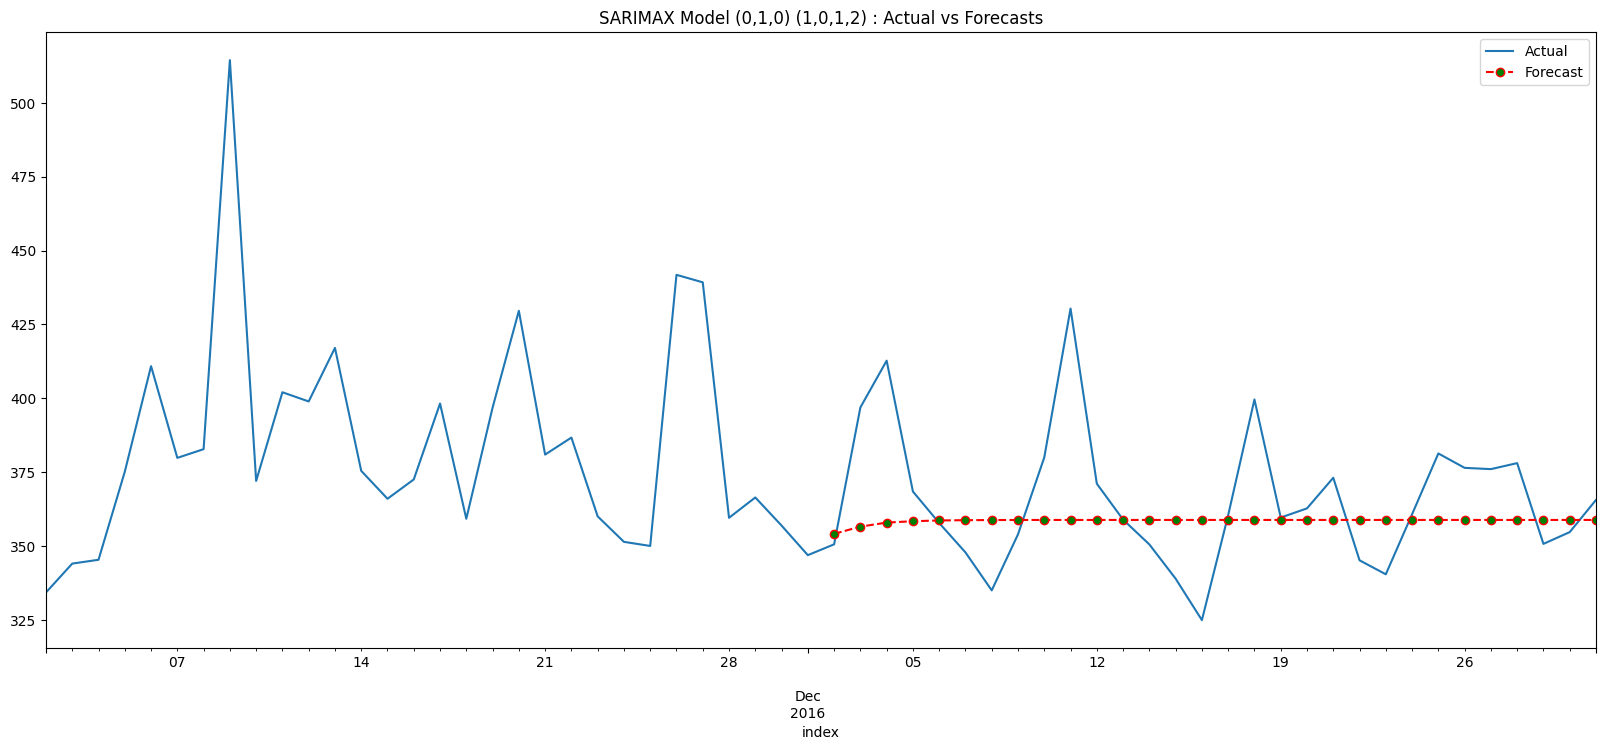



--------------------------------------------------------------------
 SARIMAX model for English Time Series
 Parameters of Model : (1,1,1) (1,0,0,2)
 MAPE of Model : 0.0662
 RMSE of Model : 473.173
--------------------------------------------------------------------


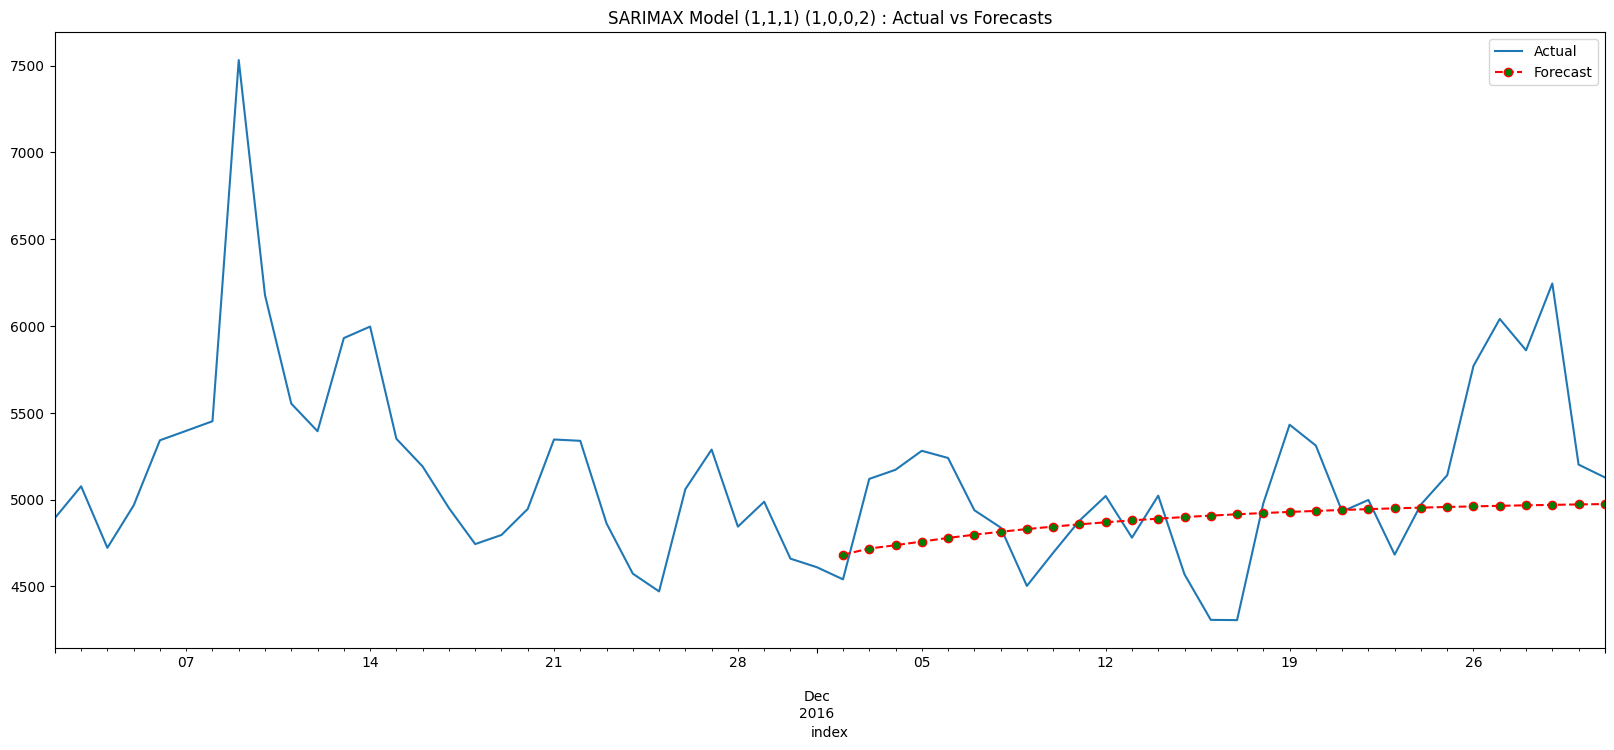



--------------------------------------------------------------------
 SARIMAX model for French Time Series
 Parameters of Model : (1,1,1) (0,1,1,2)
 MAPE of Model : 0.07522
 RMSE of Model : 80.192
--------------------------------------------------------------------


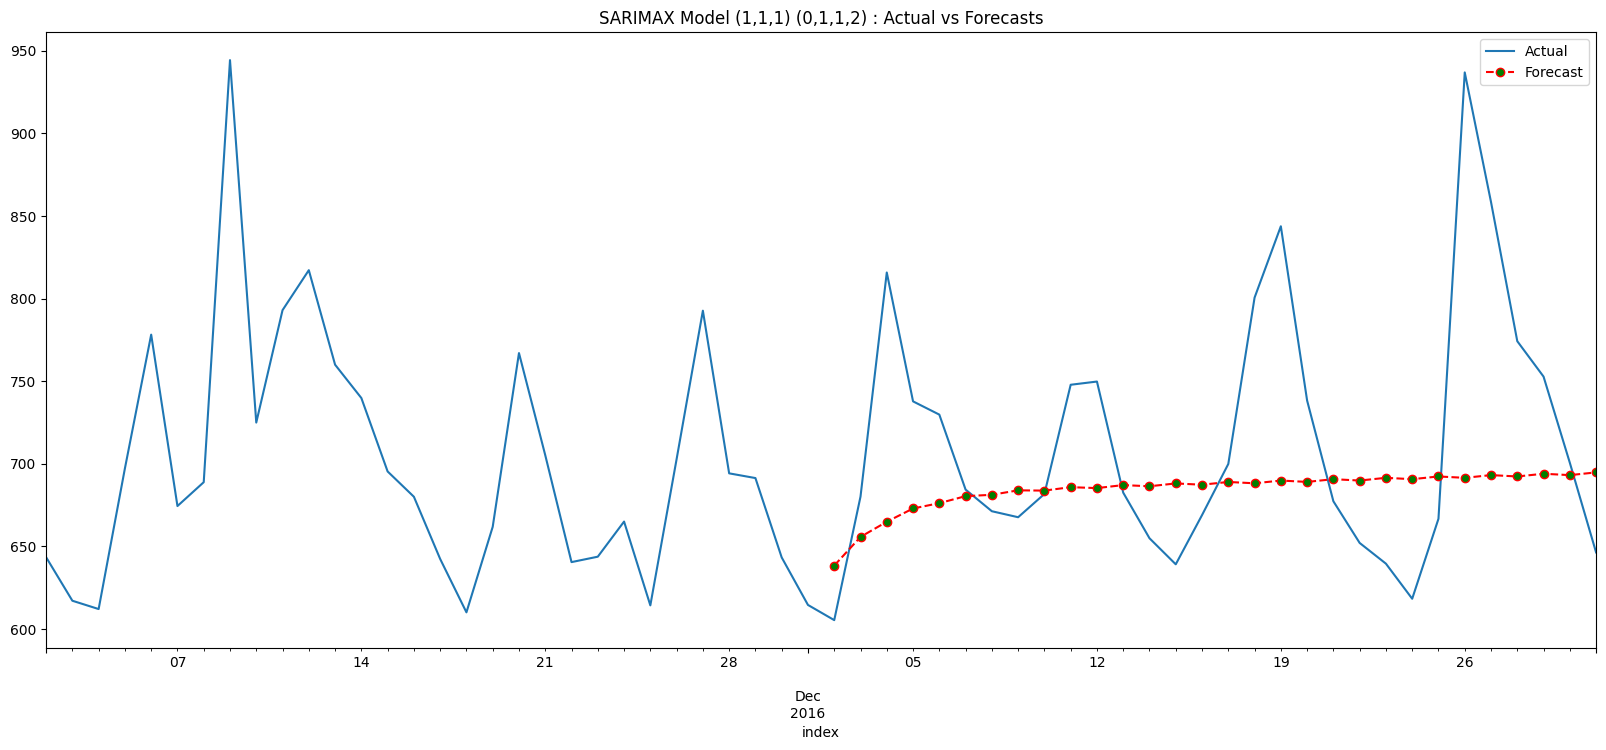



--------------------------------------------------------------------
 SARIMAX model for German Time Series
 Parameters of Model : (0,1,0) (1,0,1,2)
 MAPE of Model : 0.08235
 RMSE of Model : 123.736
--------------------------------------------------------------------


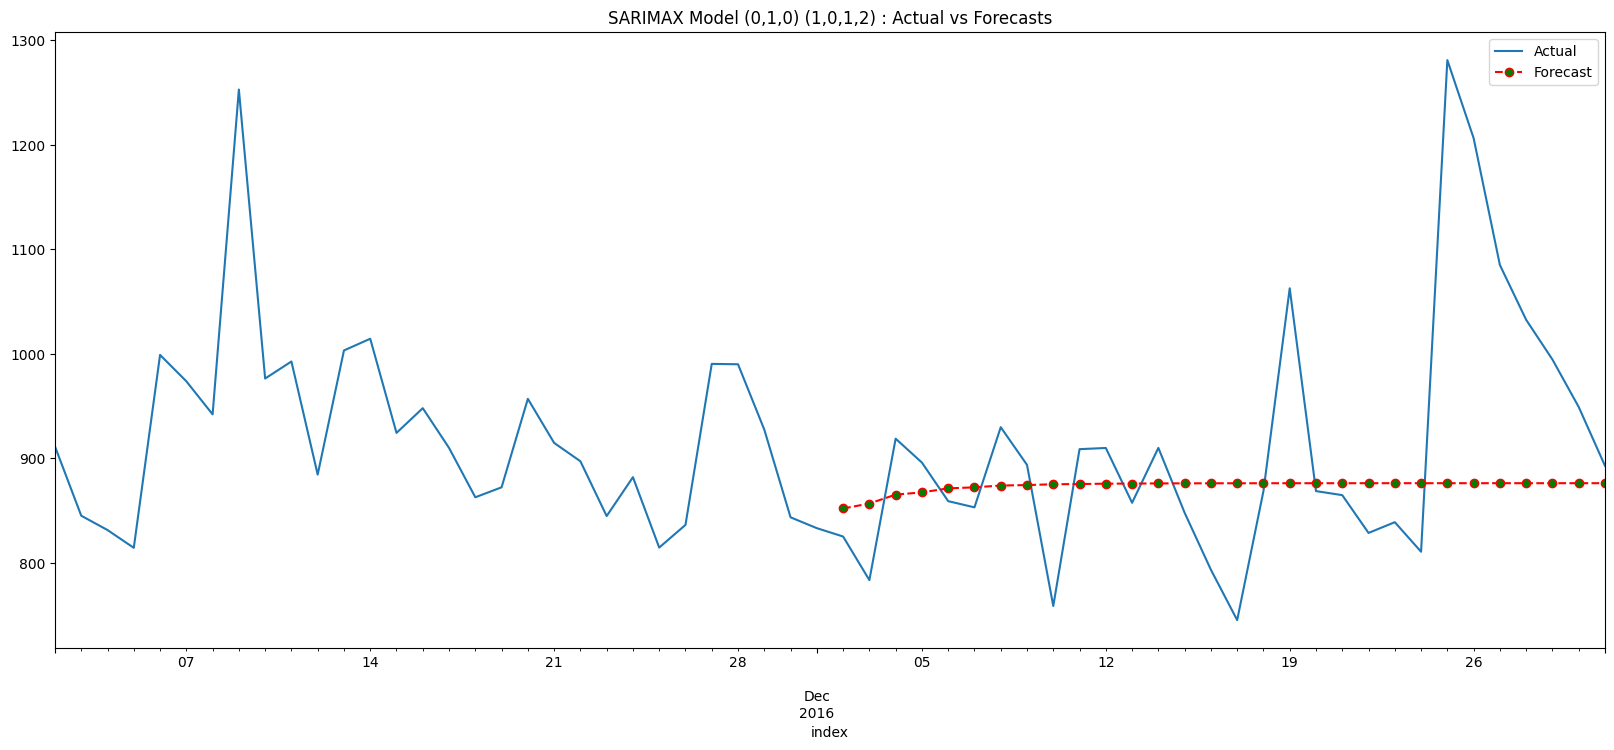



--------------------------------------------------------------------
 SARIMAX model for Japenese Time Series
 Parameters of Model : (1,1,0) (0,1,1,2)
 MAPE of Model : 0.07913
 RMSE of Model : 107.35
--------------------------------------------------------------------


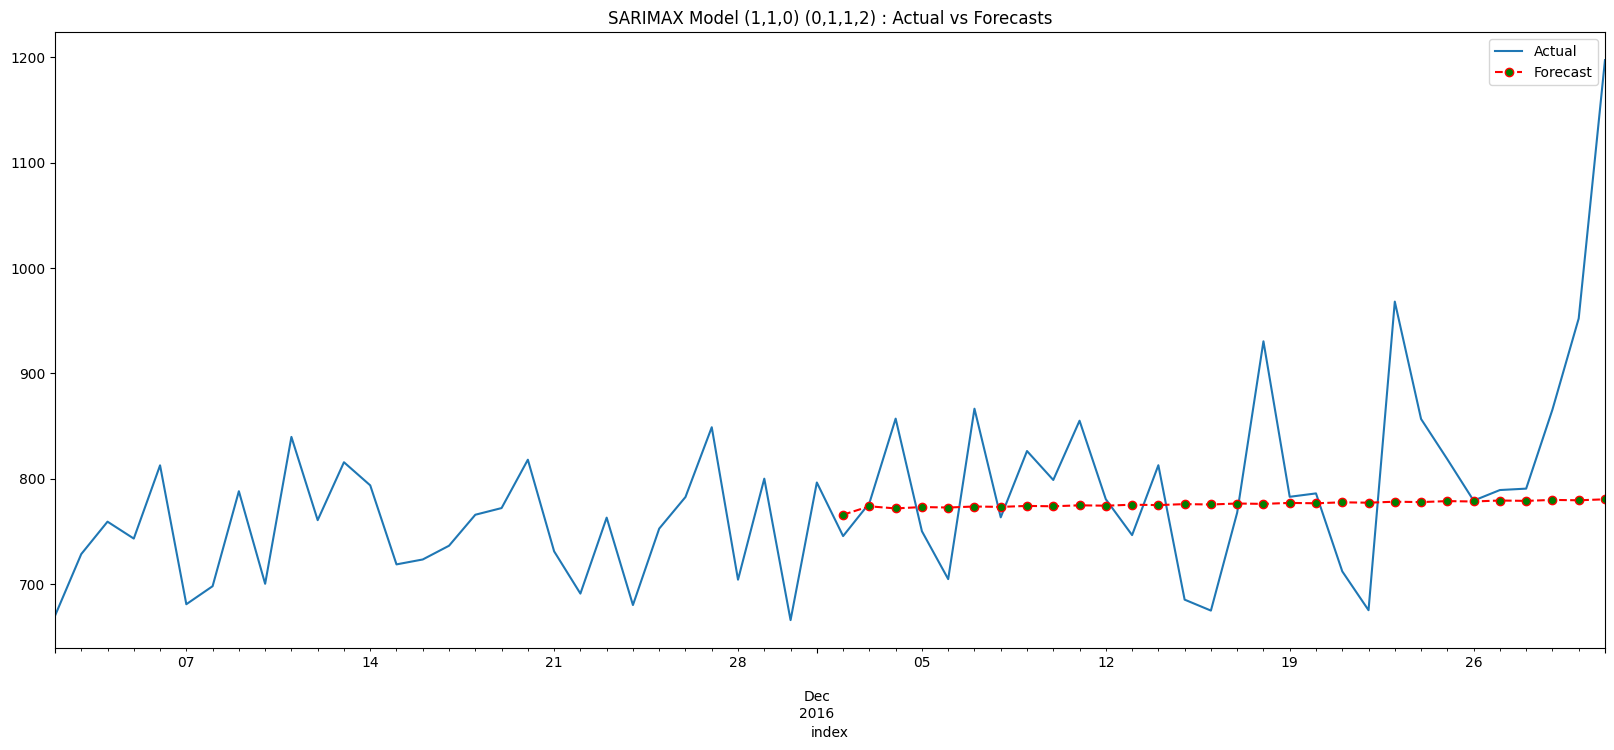



--------------------------------------------------------------------
 SARIMAX model for Russian Time Series
 Parameters of Model : (0,0,0) (1,0,1,2)
 MAPE of Model : 0.05075
 RMSE of Model : 71.022
--------------------------------------------------------------------


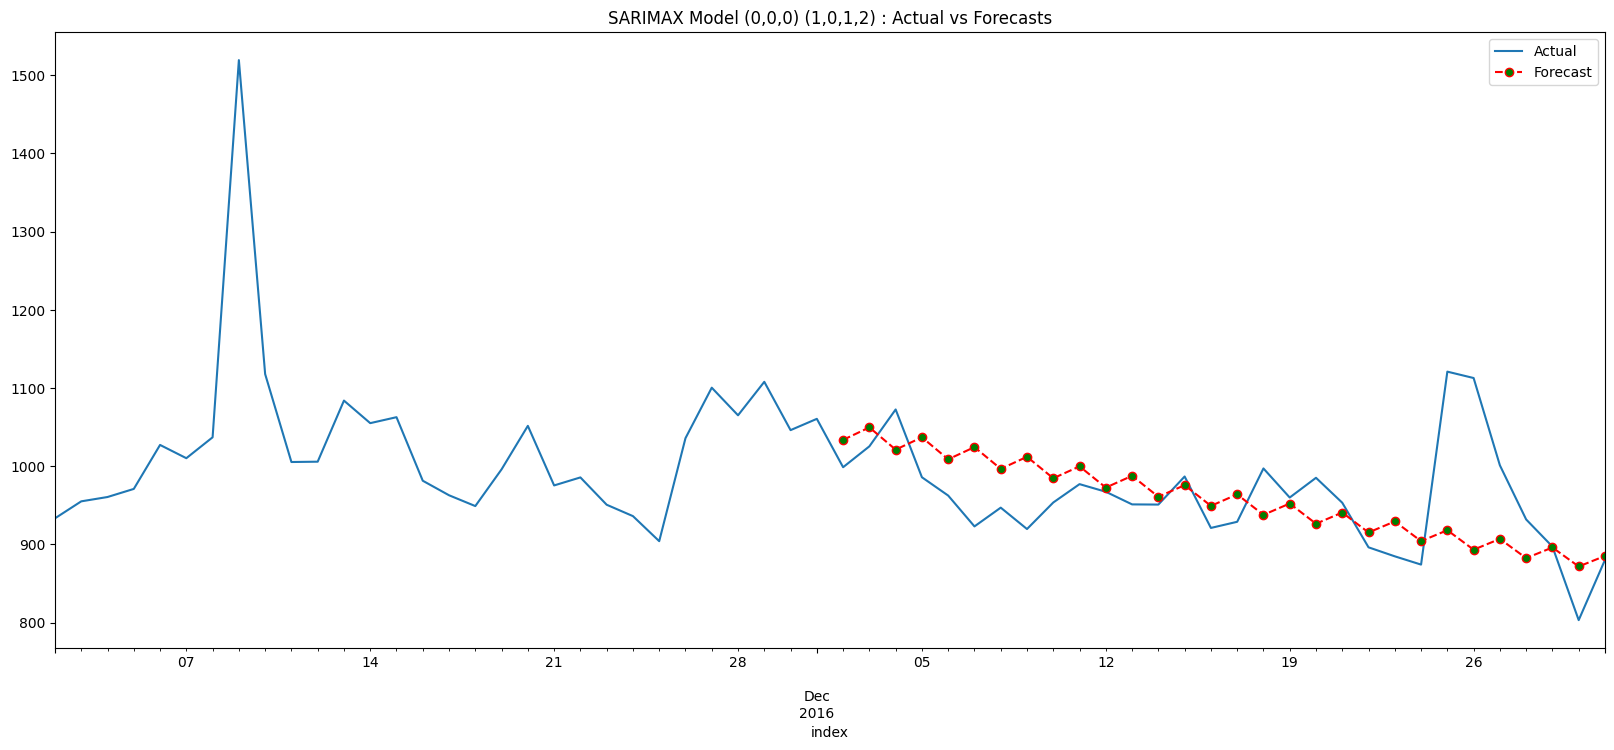



--------------------------------------------------------------------
 SARIMAX model for Spanish Time Series
 Parameters of Model : (0,0,1) (1,0,0,2)
 MAPE of Model : 0.10847
 RMSE of Model : 143.24
--------------------------------------------------------------------


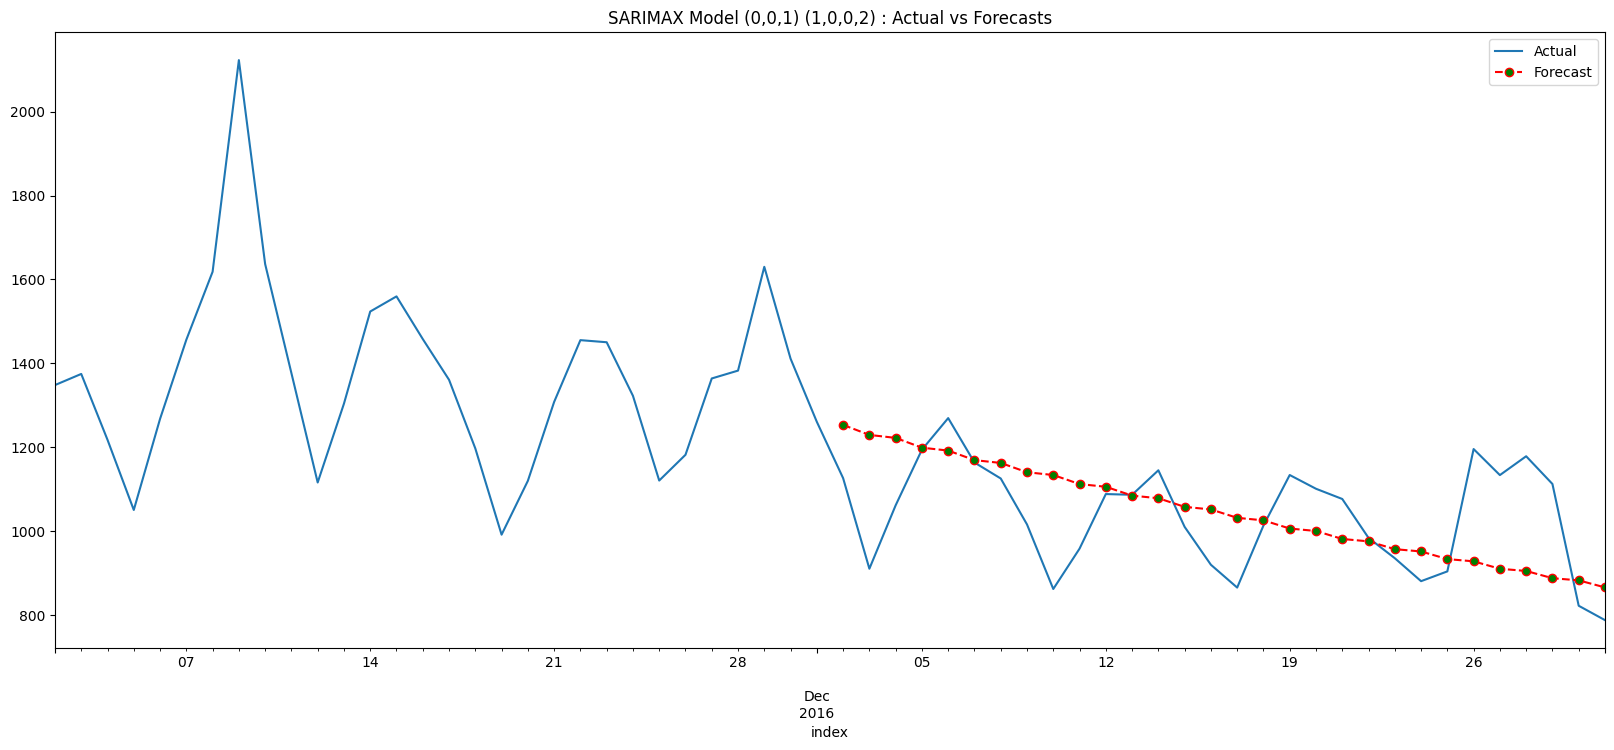

0

In [70]:
#Plotting SARIMAX model for each Language Time Series
languages = aggregated_data.columns
n = 30
plot_best_SARIMAX_model(languages, aggregated_data, n, best_param_df)

### **Forecasting using Facebook Prophet**

In [71]:
!pip install prophet

In [72]:
from prophet import Prophet

time_series = aggregated_data.reset_index()
time_series = time_series[['index', 'English']]
time_series.columns = ['ds', 'y']
time_series['ds'] = pd.to_datetime(time_series['ds'])   # Ensure 'ds' column is in dataframe

exog = campaign_data.copy(deep=True)
time_series['exog'] = exog.values


In [73]:
time_series

,ds,y,exog
0,2015-07-01,3513.862203,0
1,2015-07-02,3502.511407,0
2,2015-07-03,3325.357889,0
3,2015-07-04,3462.054256,0
4,2015-07-05,3575.520035,0
...,...,...,...
545,2016-12-27,6040.680728,1
546,2016-12-28,5860.227559,1
547,2016-12-29,6245.127510,1
548,2016-12-30,5201.783018,0


## **Insights**

*   There were 7 languages in all in the data.
*   The language with the most pages is English.
*   Three categories of access:
      1. 51.22 % of All-access
      2. Mobile web 24.77 percent
      3. 23.99 % on a desktop
*   Two points of access:
      1. The language with the most pages is English (74.93%); Agents (74.93%); Spider (24.06%).
      2. The English page ought to run the most advertising possible.




## **Recommendations**

*   To ascertain whether the time series is stationary, do an enhanced Dickey-Fuller test.
*   Fit an ARMA model if the time series is stationary. If it is non-stationary, find out what d is.
*   Plot the data's autocorrelation and partial autocorrelation graphs once stationarity has been attained.
*   Since the cut-off point in the partial autocorrelation graph (PACF) equals p, plot the PACF to find the value of p.
*   Plot the autocorrelation graph (ACF) to find q, since q is the value of the ACF's cut-off point.